In [680]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("ml-latest-small/movies.csv")
movies_rating = pd.read_csv("ml-latest-small/ratings.csv")

In [394]:
sum_movies_genres = movies["genres"].str.get_dummies('|').sum()
movies_by_genre = sum_movies_genres.sort_values(ascending=False)
movies_by_genre

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
## Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

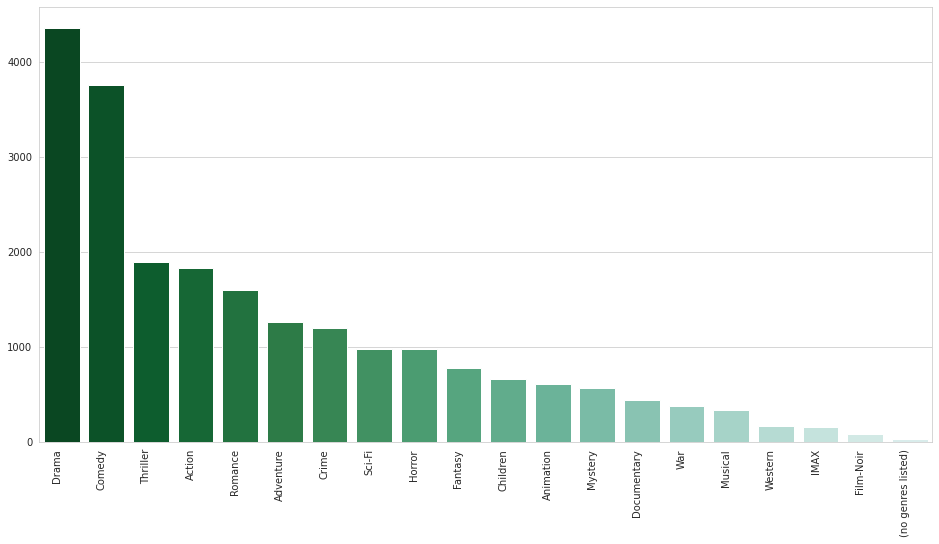

In [395]:
sns.set_style("whitegrid")

movies_by_genre = sum_movies_genres.sort_values(ascending=False)
plt.figure(figsize=(16,8))
gr = sns.barplot(x=movies_by_genre.index,
            y=movies_by_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre) + 4))
gr.set_xticklabels(movies_by_genre.index.array, rotation=90, ha='right')
plt.show()

# Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)
## Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [405]:
def plot_movie(id):
    rating_movie = movies_rating.query(f"movieId=={id}")['rating']
    rating_movie.plot(kind='hist')
    return rating_movie.describe()

rating = movies_rating.groupby("movieId")['rating'].mean()

movies_with_mean = movies.join(rating, on="movieId")

count_votes_by_movieId = movies_rating.groupby('movieId')['rating'].count()
count_votes_by_movieId.rename('votes', inplace=True)

movies_with_rating_and_votes = movies_with_mean.join(count_votes_by_movieId, on="movieId").round({'rating':1})
movies_clean = movies_with_rating_and_votes.query("votes > 100").sort_values(by="votes", ascending=False)
movies_clean

,movieId,title,genres,rating,votes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.2,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.4,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.2,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.2,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.2,278.0
...,...,...,...,...,...
5,6,Heat (1995),Action|Crime|Thriller,3.9,102.0
613,778,Trainspotting (1996),Comedy|Crime|Drama,4.0,102.0
395,454,"Firm, The (1993)",Drama|Thriller,3.5,101.0
378,434,Cliffhanger (1993),Action|Adventure|Thriller,3.0,101.0


In [397]:
movies_clean.query("rating == 3")

,movieId,title,genres,rating,votes
302,344,Ace Ventura: Pet Detective (1994),Comedy,3.0,161.0
504,586,Home Alone (1990),Children|Comedy,3.0,116.0
156,185,"Net, The (1995)",Action|Crime|Thriller,3.0,112.0
378,434,Cliffhanger (1993),Action|Adventure|Thriller,3.0,101.0


count    161.000000
mean       3.040373
std        1.070886
min        0.500000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

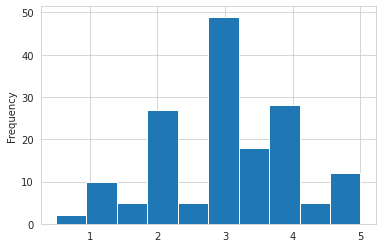

In [398]:
plot_movie(344)

count    116.000000
mean       2.995690
std        0.992353
min        1.000000
25%        2.500000
50%        3.000000
75%        3.500000
max        5.000000
Name: rating, dtype: float64

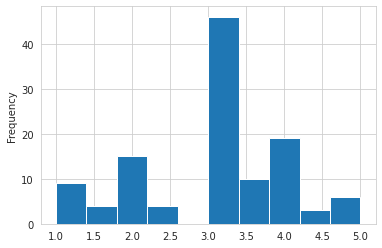

In [399]:
plot_movie(586)

count    112.000000
mean       3.040179
std        1.037882
min        0.500000
25%        2.500000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

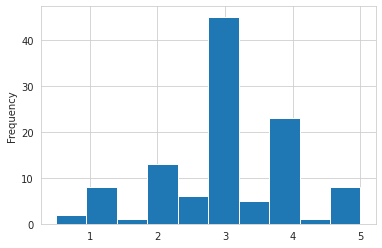

In [400]:
plot_movie(185)

count    101.000000
mean       3.034653
std        0.900715
min        0.500000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: rating, dtype: float64

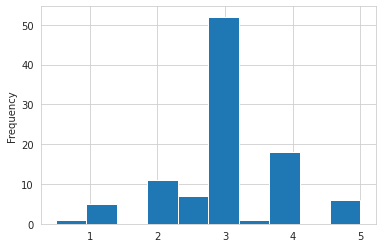

In [401]:
plot_movie(434)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

### Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

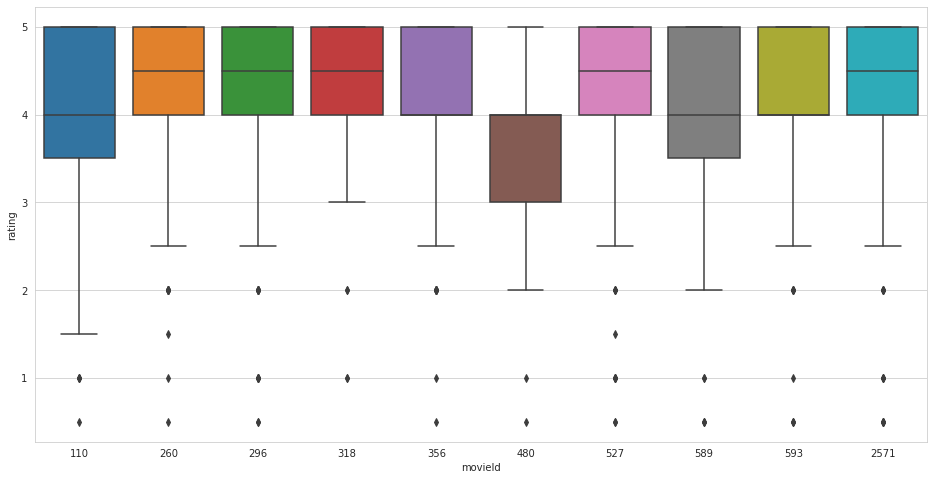

In [429]:
movies_id = movies_clean.head(10)["movieId"].tolist()
plt.figure(figsize=(16, 8))
sns.boxplot(data = movies_rating.query(f"movieId in {movies_id}"), x ="movieId", y="rating")

### Dentre os 10, o filme de id 318 possui a melhor distribuição de notas.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

### Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

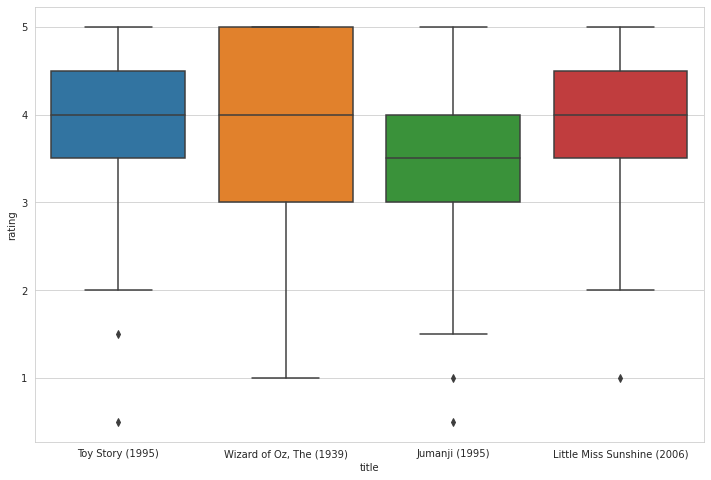

In [460]:
plt.figure(figsize=(12, 8))
boxplot_data = movies_rating.query("movieId in [1,2,919,46578]").merge(movies[["movieId", "title"]], on="movieId")
sns.boxplot(data = boxplot_data, x = "title", y="rating")

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)
### Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [551]:
def movies_3m(id):
    movie_3m = movies_rating.query(f"movieId=={id}")['rating']
    movie_title = movies.query(f"movieId=={id}")['title']
    print(movie_title.values[0])
    print("Média = ", movie_3m.mean())
    print("Mediana = ", movie_3m.median())
    print("Moda = ", movie_3m.mode()[0])
    print('\n')

In [559]:
for n in movies_with_mean.query("rating > 0.1 and rating < 1")["movieId"].head(5):
    movies_3m(n)

Amityville Curse, The (1990)
Média =  0.75
Mediana =  0.75
Moda =  0.5


Gypsy (1962)
Média =  0.5
Mediana =  0.5
Moda =  0.5


House Party 2 (1991)
Média =  0.75
Mediana =  0.75
Moda =  0.5


Killer Shrews, The (1959)
Média =  0.5
Mediana =  0.5
Moda =  0.5


Horrors of Spider Island (Ein Toter Hing im Netz) (1960)
Média =  0.5
Mediana =  0.5
Moda =  0.5




In [560]:
for n in movies_with_mean.query("rating > 2.4 and rating < 3.6")["movieId"].head(5):
    movies_3m(n)

Jumanji (1995)
Média =  3.4318181818181817
Mediana =  3.5
Moda =  4.0


Grumpier Old Men (1995)
Média =  3.2596153846153846
Mediana =  3.0
Moda =  3.0


Father of the Bride Part II (1995)
Média =  3.0714285714285716
Mediana =  3.0
Moda =  3.0


Sabrina (1995)
Média =  3.185185185185185
Mediana =  3.0
Moda =  3.0


Tom and Huck (1995)
Média =  2.875
Mediana =  3.0
Moda =  3.0




In [563]:
for n in movies_with_mean.query("rating > 4 and rating <= 5")["movieId"].head(5):
    movies_3m(n)

Persuasion (1995)
Média =  4.2272727272727275
Mediana =  4.5
Moda =  4.5


City of Lost Children, The (Cité des enfants perdus, La) (1995)
Média =  4.0131578947368425
Mediana =  4.0
Moda =  4.0


Cry, the Beloved Country (1995)
Média =  4.25
Mediana =  4.25
Moda =  3.5


Usual Suspects, The (1995)
Média =  4.237745098039215
Mediana =  4.5
Moda =  5.0


Lamerica (1994)
Média =  5.0
Mediana =  5.0
Moda =  5.0




## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)
### Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

In [599]:
def plot_movie_box(id):
    rating_movie = movies_rating.query(f"movieId=={id}")['rating']
    fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(16, 8))
    rating_movie.plot(ax = ax, kind='hist')
    rating_movie.plot.box().plot()
    plt.show()
    return rating_movie.describe()

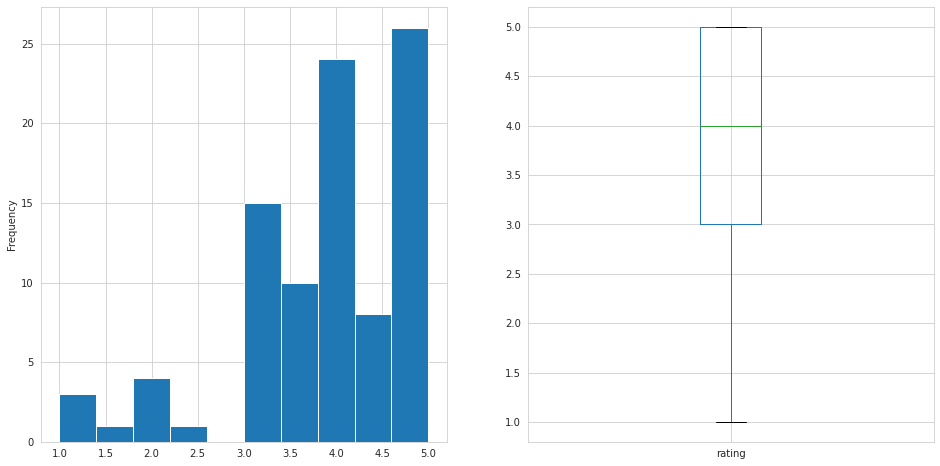

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [602]:
plot_movie_box(919)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
### Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [689]:
movies_with_mean['release_date'] = movies['title'].str.extract('.*\((.*)\).*', expand = False)
movies_with_mean

,movieId,title,genres,rating,release_date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017
9739,193585,Flint (2017),Drama,3.500000,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018


In [690]:
movies_with_mean.sort_values(by='release_date')

,movieId,title,genres,rating,release_date
5868,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,3.500,1902
6355,49389,The Great Train Robbery (1903),Crime|Western,2.500,1903
9020,140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,4.000,1908
4743,7065,"Birth of a Nation, The (1915)",Drama|War,2.000,1915
8170,102747,"Rink, The (1916)",Comedy,3.500,1916
...,...,...,...,...,...
9709,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,3.875,2018
9710,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,3.900,2018
9681,183611,Game Night (2018),Action|Comedy|Crime|Horror,4.000,2018
9674,183011,The Commuter (2018),Crime|Drama|Mystery|Thriller,1.500,2018


In [724]:
mean_by_date = movies_with_mean.dropna().groupby('release_date').mean().reset_index()[['release_date', 'rating']]
mean_by_date.sort_values(by="release_date", ascending=False, inplace=True)
mean_by_date

,release_date,rating
106,2018,3.372561
105,2017,3.376749
104,2016,3.103748
103,2015,3.069094
102,2014,3.113464
...,...,...
4,1916,3.562500
3,1915,2.000000
2,1908,4.000000
1,1903,2.500000


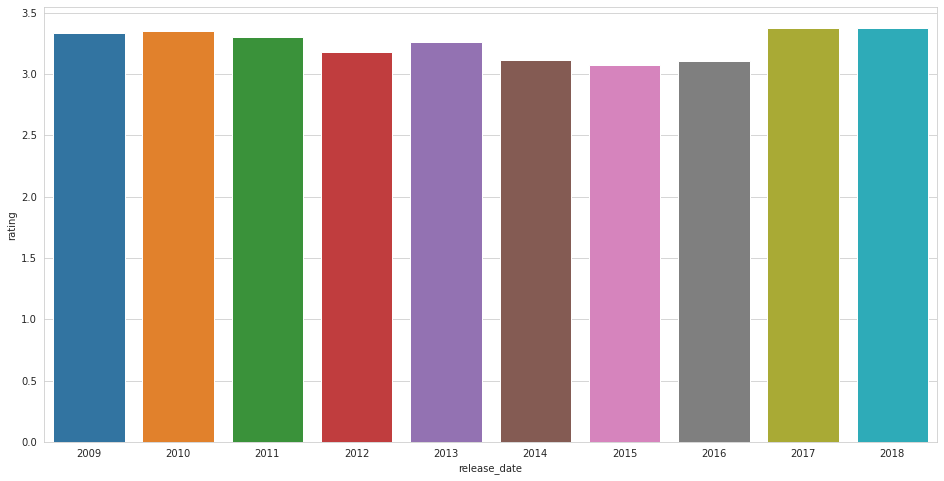

In [726]:
plt.figure(figsize=(16,8))
gr = sns.barplot(
                x=mean_by_date['release_date'].head(10),
                y=mean_by_date['rating'].head(10)
                )
plt.show()